In [42]:
from lib2to3.pgen2.token import NT_OFFSET
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns; sns.set()
import librosa
import librosa.display
import IPython.display as ipd
import sys
from scipy import signal
# 读取音频wav文件       
audio_path = r"C:\Users\Richard\Desktop\COM3502代码\speech_8kHz_murder.wav"
s,sr = librosa.load(audio_path, sr=None, mono=True)
ipd.Audio(s,rate=sr)
sr

8000

C:\Users\Richard\AppData\Local\Temp\ipykernel_21140\3392958955.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='dB')
C:\Users\Richard\AppData\Local\Temp\ipykernel_21140\3392958955.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='dB');


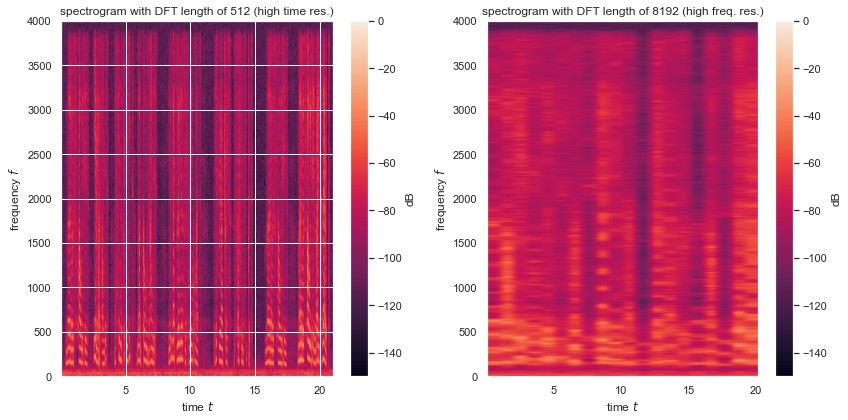

In [43]:
figure = plt.figure(figsize=(12,6))
LDFT = 512
plt.subplot(1,2,1)
plt.specgram(s,Fs=sr,NFFT=LDFT) # NFFT default:256
plt.title('spectrogram with DFT length of ' + str(LDFT) + ' (high time res.)')
plt.xlabel('time $t$')
plt.ylabel('frequency $f$')
plt.colorbar(label='dB')
plt.clim(-150,0)

LDFT=8192

plt.subplot(1,2,2)
plt.specgram(s, Fs=sr, NFFT=LDFT); # NFFT default: 256
plt.title('spectrogram with DFT length of ' + str(LDFT) + ' (high freq. res.)')
plt.xlabel('time $t$')
plt.ylabel('frequency $f$')
plt.grid(None)  # no grid (in case you used seaborn)

plt.colorbar(label='dB');
plt.clim(-150,0)

plt.tight_layout()
plt.show()

In [44]:
import matplotlib.pyplot as plt
def plot_tolerance_scheme(Wp=0.25,Ws=0.3,Rp_lin=0.9,Rs_lin=0.1):
    """
    Plots a tolerance scheme for a (low-pass) filter design.
    
    Parameters
    ----------
    Wp : float, optional (but recommended)
        pass limit frequency (normalised) $W_p = \Omega / \pi$
    Ws : float, optional (but recommended)
        stop limit frequency (normalised)
    Rp_lin : float, optional (but recommended)
        allowed ripple range in pass band (linear), default 0.9
    Rs_lin : float, optional (but recommended)
        allowed ripple range in pass band (linear), default 0.1

    Example use:
    -------
    signal
        plot_tolerance_scheme(Wp=0.25,Ws=0.3,Rp_lin=0.9,Rs_lin=0.1)
    """
    dh1x=[0,Ws];  dh1y=[1,1];            # (x,y) coordinates of lines
    dh2x=[0,Wp];  dh2y=[Rp_lin,Rp_lin]; 
    dv2x=[Wp,Wp]; dv2y=[0,Rp_lin];   
    sh1x=[Ws,1];  sh1y=[Rs_lin,Rs_lin]; 
    sh2x=[Wp,1];  sh2y=[0,0]; 
    svx=[Ws,Ws];  svy=[Rs_lin,1];  
    # plot the actual lines
    plt.plot(dh1x,dh1y,'k--',dh2x,dh2y,'k--',dv2x,dv2y,'k--',sh1x,sh1y,'k--',
             sh2x,sh2y,'k--',svx,svy,'k--');
    plt.xlabel('Frequency $\Omega/\pi$');
    





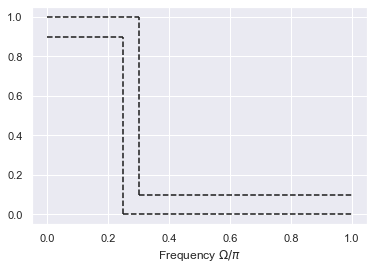

In [45]:
Wp=0.25;    # passband edge frequency 
Ws=0.3;     # stopband edge frequency 
Rp_lin=0.9; # allowed ripples in the pass band area
Rs_lin=0.1; # allowed ripples in the stop band area

plot_tolerance_scheme(Wp,Ws,Rp_lin,Rs_lin)

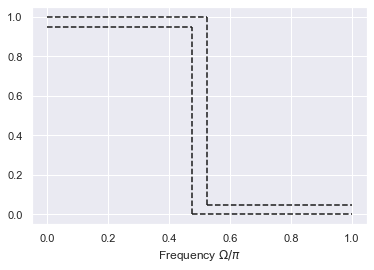

In [46]:
Wp = 2*(2000*(1-0.05))/sr # ?
Ws = 1-Wp
Rp_lin = 0.95
Rs_lin = 0.05
plot_tolerance_scheme(Wp,Ws,Rp_lin,Rs_lin)

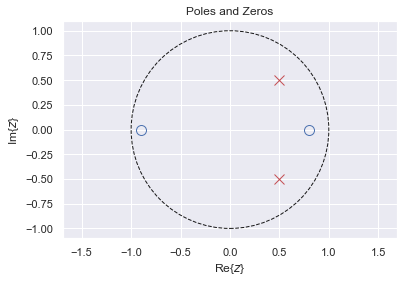

In [47]:
def zplane(z, p, title='Poles and Zeros'):
    "Plots zeros and poles in the complex z-plane"
    ax = plt.gca()

    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms=10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms=10)
    unit_circle = plt.Circle((0, 0), radius=1, fill=False,
                             color='black', ls='--', alpha=0.9)
    ax.add_patch(unit_circle)

    plt.title(title)
    plt.xlabel('Re{$z$}')
    plt.ylabel('Im{$z$}')
    plt.axis('equal')

poles = [0.5-0.5j,0.5+0.5j]
zeros = [-0.9,0.8]

zplane(zeros,poles)


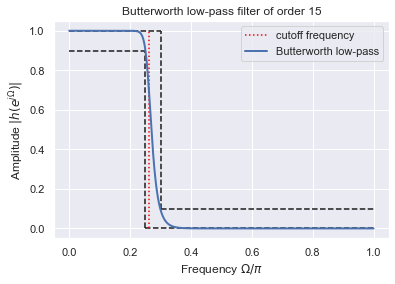

In [49]:
Wp = 0.25
Ws = 0.3
Rp_lin = 0.9
Rs_lin = 0.1

Rp = -20*np.log10(Rp_lin)
Rs = -20*np.log10(Rs_lin)

N,Wn = signal.buttord(Wp,Ws,Rp,Rs)

b,a = signal.butter(N,Wn,'low')

f,h = signal.freqz(b,a)
omega = np.linspace(0,1,len(f))

plot_tolerance_scheme(Wp,Ws,Rp_lin,Rs_lin)
plt.plot([Wn,Wn],[0,1],color='red',ls=':',label='cutoff frequency')
plt.plot(omega,abs(h),lw = 2,label='Butterworth low-pass')
plt.title('Butterworth low-pass filter of order ' + str(N))
plt.ylabel('Amplitude $|h(e^{j \Omega})|$')
plt.xlabel('Frequency $\Omega/\pi$')
plt.legend()


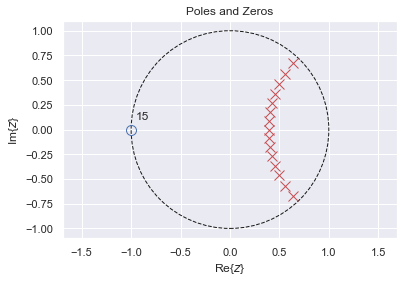

In [51]:
# plot zeros and poles in the z plane
zplane(-1, np.roots(a))
plt.text(-0.95,0.1,str(N));

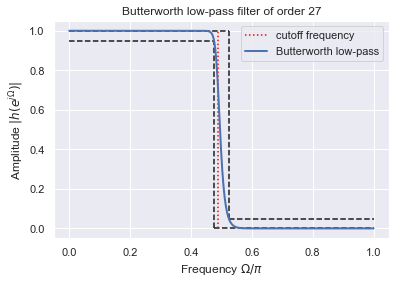

In [52]:
Wp = 0.475
Ws = 0.525
Rp_lin = 0.95
Rs_lin = 0.05

Rp = -20*np.log10(Rp_lin)
Rs = -20*np.log10(Rs_lin)

N,Wn = signal.buttord(Wp,Ws,Rp,Rs)

b,a = signal.butter(N,Wn,'low')

f,h = signal.freqz(b,a)
omega = np.linspace(0,1,len(f))

plot_tolerance_scheme(Wp,Ws,Rp_lin,Rs_lin)
plt.plot([Wn,Wn],[0,1],color='red',ls=':',label='cutoff frequency')
plt.plot(omega,abs(h),lw = 2,label='Butterworth low-pass')
plt.title('Butterworth low-pass filter of order ' + str(N))
plt.ylabel('Amplitude $|h(e^{j \Omega})|$')
plt.xlabel('Frequency $\Omega/\pi$')
plt.legend()


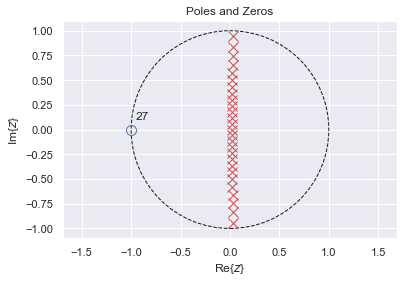

In [53]:
# plot zeros and poles in the z plane
zplane(-1, np.roots(a))
plt.text(-0.95,0.1,str(N));